<a href="https://colab.research.google.com/github/nadiataoufik/Census_income-/blob/master/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [73]:
data=pd.read_csv('/content/drive/MyDrive/3.12.+Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


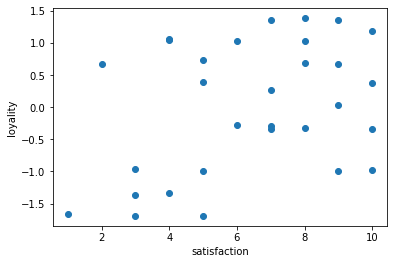

In [76]:
#plot the data 
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('satisfaction')
plt.ylabel('loyality')
plt.show()

In [77]:
# select the features 
x=data.copy()

In [78]:
from sklearn.cluster import KMeans

In [79]:
kmeans=KMeans(2)

In [80]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
identify_clusters=kmeans.fit_predict(x)

In [84]:
identified_clusters

array([0, 0, 2, 0, 1, 0], dtype=int32)

In [85]:
clusters=x.copy()

In [86]:
clusters['clusters']=identify_clusters

In [88]:
clusters.head()

,Satisfaction,Loyalty,clusters
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0


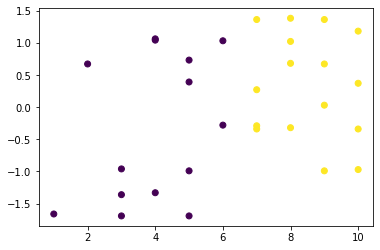

In [89]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['clusters'])

In [90]:
#standarize 
from sklearn.preprocessing import StandardScaler

In [91]:
scaler=StandardScaler()

In [92]:
x_scaled=scaler.fit_transform(x)

In [93]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [94]:
# elbow method 
wcss=[]
for i in range(1,10):
  kmeans=KMeans(i)
  kmeans.fit(x_scaled)
  wcss_iter=kmeans.inertia_
  wcss.append(wcss_iter)

In [96]:
numb_clusters=range(1,10)

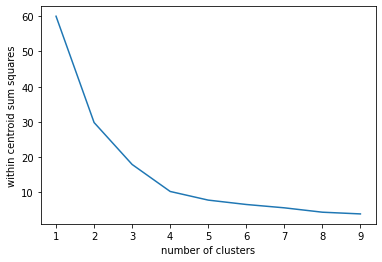

In [97]:
plt.plot(numb_clusters,wcss)
plt.xlabel('number of clusters')
plt.ylabel('within centroid sum squares')
plt.show()

In [98]:
kmeans=KMeans(4)
kmeans.fit(x_scaled)
clusters_new=x.copy()
clusters_new['cluster_pre']=kmeans.fit_predict(x_scaled)
clusters_new


,Satisfaction,Loyalty,cluster_pre
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,3
9,8,0.68,3


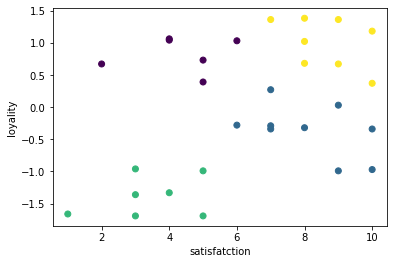

In [99]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pre'])
plt.xlabel('satisfatction')
plt.ylabel('loyality')
plt.show()